1. Import libraris and read dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_url = './data/opsd_germany_daily.csv'
opsd_daily = pd.read_csv(data_url)

print(opsd_daily.shape)
print(opsd_daily.dtypes)
opsd_daily.head(3)

(4383, 5)
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [2]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [3]:
opsd_daily = pd.read_csv(data_url,index_col = 0,parse_dates=True)
#Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()
# Display a random sampling of rows
opsd_daily.sample(5,random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


2. Time-based indexing

In [4]:
#get the data from 2014-01-20 to 2014-01-22
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [5]:
#get the data in 2014-02
opsd_daily.loc['2014-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-02-01,1391.430,282.132,41.298,323.430,2014,2,Saturday
2014-02-02,1265.416,107.799,33.744,141.543,2014,2,Sunday
2014-02-03,1598.551,108.910,35.126,144.036,2014,2,Monday
2014-02-04,1617.799,131.890,44.494,176.384,2014,2,Tuesday
2014-02-05,1623.241,217.711,49.166,266.877,2014,2,Wednesday
2014-02-06,1597.979,288.646,67.497,356.143,2014,2,Thursday
2014-02-07,1576.930,470.114,35.591,505.705,2014,2,Friday
2014-02-08,1365.813,361.931,45.606,407.537,2014,2,Saturday
2014-02-09,1252.107,423.278,44.165,467.443,2014,2,Sunday


3. Visualizing time series data

<Axes: xlabel='Date'>

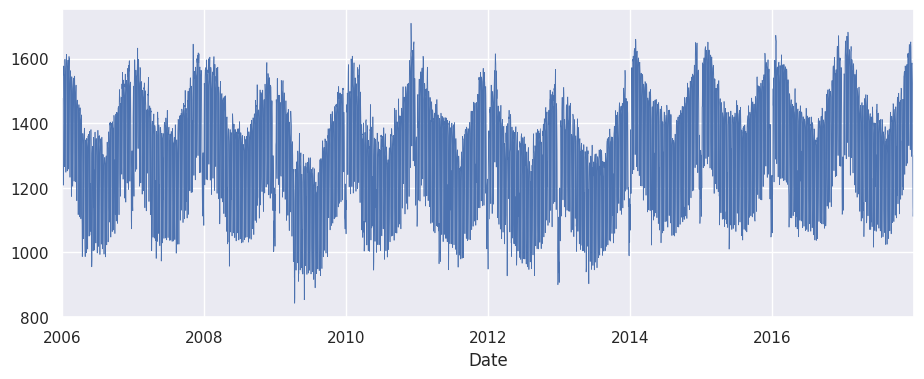

In [6]:
sns.set(rc={'figure.figsize':(11,4)})
opsd_daily['Consumption'].plot(linewidth=0.5)

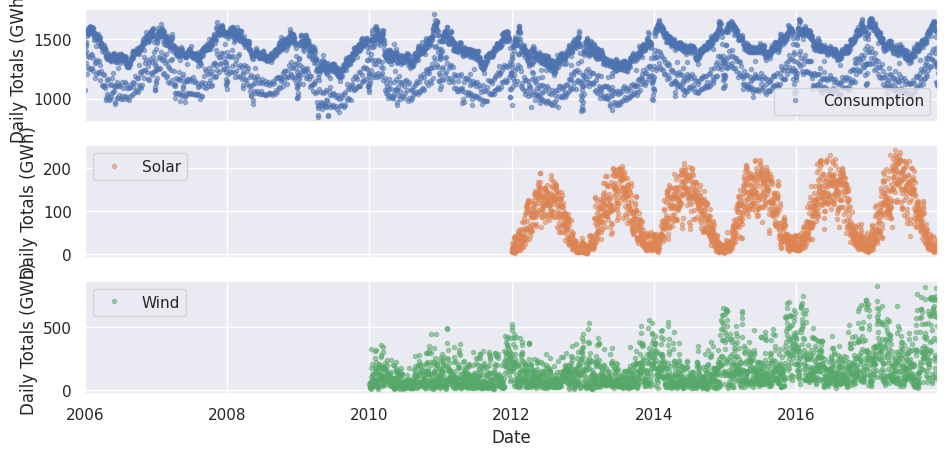

In [7]:
cols_plot = ['Consumption','Solar','Wind']
axes = opsd_daily[cols_plot].plot(marker='.',alpha=0.5,linestyle='None',figsize=(11,5),subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
plt.show()

4. Seasonality

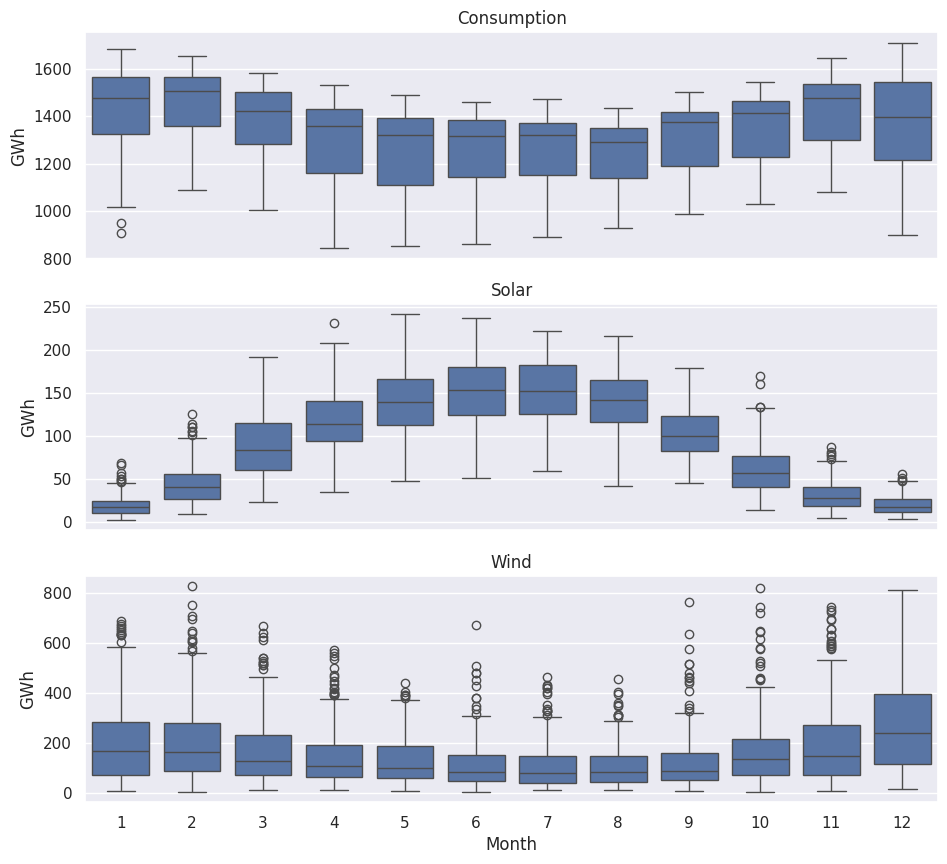

In [9]:
fig,axes = plt.subplots(3,1,figsize=(11,10),sharex=True)
for name,ax in zip(['Consumption','Solar','Wind'],axes):
  sns.boxplot(data=opsd_daily,x='Month',y=name,ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel("")


5. Freqencies

In [10]:
pd.date_range('1998-03-10','1998-03-15',freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [11]:
times_sample = pd.to_datetime(['2013-02-03','2013-02-06','2013-02-08'])

consum_sample = opsd_daily.loc[times_sample,['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [12]:
#Convert the data to daily freqency, without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missing forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D',method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


6. Resampling

In [13]:
#Specity the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption','Wind','Solar','Wind+Solar']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


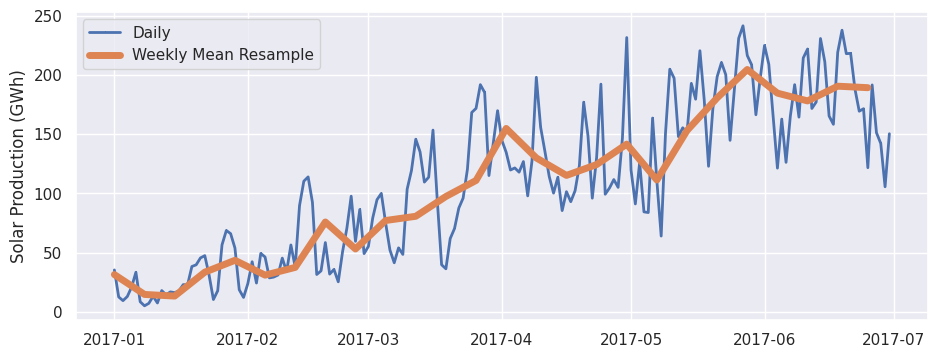

In [16]:
start,end = '2017-01','2017-06'

fig,ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end,'Solar'], marker=',',linestyle='-',linewidth=2,label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end,'Solar'],marker=',',linestyle='-',linewidth=5,label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

In [19]:
opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name='Year'
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar']/opsd_annual['Consumption']
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017')])

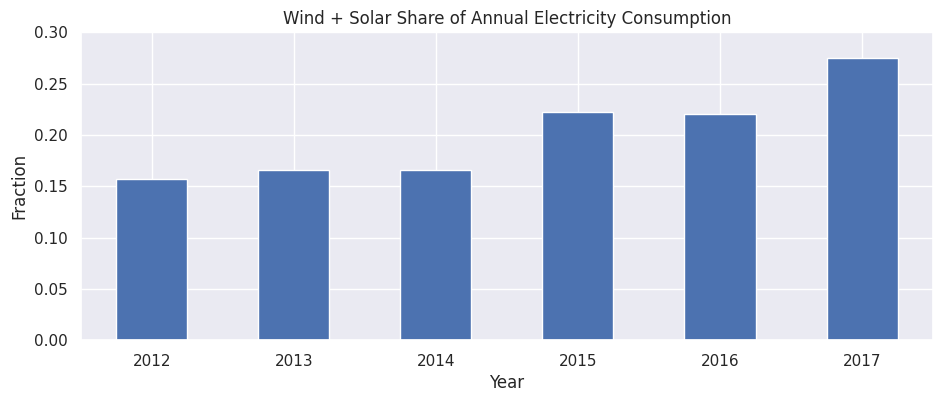

In [24]:
ax = opsd_annual.loc[2012:,'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0,0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)

7. Rolling windows

In [25]:
opsd_7d = opsd_daily[data_columns].rolling(7,center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


8. Trends

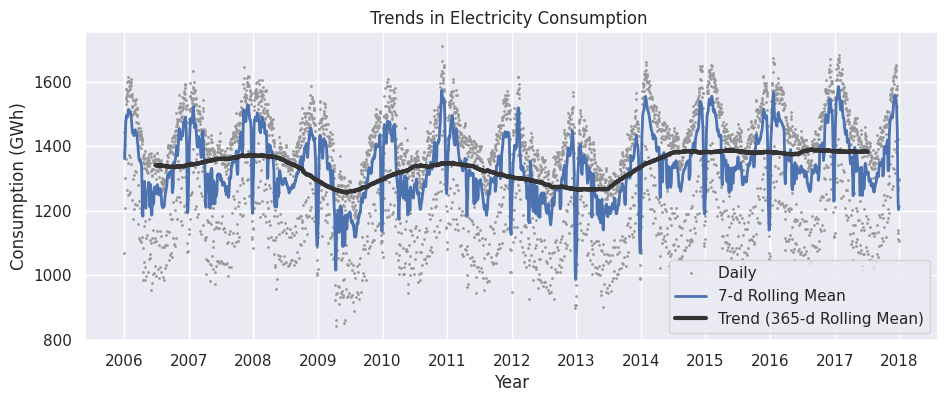

In [26]:
import matplotlib . dates as mdates

opsd_365d = opsd_daily[data_columns].rolling ( window=365 , center=True ,min_periods
=360).mean()
fig , ax = plt . subplots ()
ax. plot ( opsd_daily ["Consumption"] , marker =".", markersize =2 , color ="0.6 ",
linestyle ="None", label ="Daily ")
ax.plot (opsd_7d ["Consumption"] , linewidth =2 , label ="7-d Rolling Mean")
ax.plot (opsd_365d ["Consumption"] , color ="0.2", linewidth =3 ,
label ="Trend (365-d Rolling Mean)")
# Set x- ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator ( mdates . YearLocator () )
ax.legend ()
ax.set_xlabel ("Year")
ax.set_ylabel ("Consumption (GWh)")
ax.set_title ("Trends in Electricity Consumption ")
plt.show ()

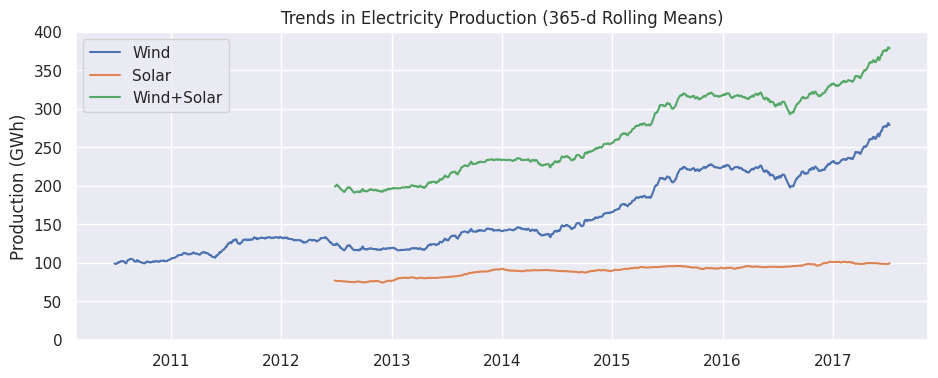

In [27]:
# Plot 365 - day rolling mean time series of wind and solar power
fig , ax = plt.subplots()
for nm in ["Wind", "Solar", "Wind+Solar"]:
  ax.plot ( opsd_365d[nm] , label=nm)
  # Set x- ticks to yearly interval , adjust y- axis limits , add legend and labels
  ax.xaxis.set_major_locator (mdates.YearLocator())
  ax.set_ylim(0 , 400)
  ax.legend()
  ax.set_ylabel("Production (GWh)")
  ax.set_title("Trends in Electricity Production (365-d Rolling Means)")
plt.show ()